In [1]:
import numpy as np
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import os

def load_latent_data_mu(output_dir, rollout_ids):
    mu_list = []
    for rollout_id in rollout_ids:
        # mu = np.load(os.path.join(output_dir, f"mu_rollout_{rollout_id}.npy"))
        mu = np.load(os.path.join(output_dir, f"mu_batch_{rollout_id}.npy"))
        mu_list.append(mu)
    return np.concatenate(mu_list, axis=0)


def load_latent_data_logvar(output_dir, rollout_ids):
    logvar_list = []
    for rollout_id in rollout_ids:
        # logvar = np.load(os.path.join(output_dir, f"logvar_rollout_{rollout_id}.npy"))
        logvar = np.load(os.path.join(output_dir, f"logvar_batch_{rollout_id}.npy"))
        logvar_list.append(logvar)
    return np.concatenate(logvar_list, axis=0)

def visualize_latent_space(mu, method='pca'):
    if method == 'pca':
        reducer = PCA(n_components=2)
        reduced_mu = reducer.fit_transform(mu)
        
        # 累積寄与率をプロット
        explained_variance = reducer.explained_variance_ratio_
        cumulative_variance = explained_variance.cumsum()
        plt.figure(figsize=(8, 6))
        plt.step(range(1, len(cumulative_variance) + 1), cumulative_variance, where='mid', label='Cumulative explained variance')
        plt.bar(range(1, len(explained_variance) + 1), explained_variance, alpha=0.5, label='Individual explained variance')
        plt.xlabel('Principal component index')
        plt.ylabel('Explained variance ratio')
        plt.legend()
        plt.title('PCA Explained Variance')
        plt.show()

    elif method == 'tsne':
        perplexity = min(30, mu.shape[0] // 2)
        reducer = TSNE(n_components=2, perplexity=perplexity, random_state=42)
        reduced_mu = reducer.fit_transform(mu)
    else:
        raise ValueError("Unknown method for dimensionality reduction")

    # 2Dプロット
    plt.figure(figsize=(8, 6))
    plt.scatter(reduced_mu[:, 0], reduced_mu[:, 1], alpha=0.6, edgecolor='k')
    plt.title(f"{method.upper()} Visualization of Latent Space (mu)")
    plt.xlabel("Dimension 1")
    plt.ylabel("Dimension 2")
    plt.show()



def plot_logvar_std(logvar):
    # logvar -> 標準偏差に変換
    std = np.sqrt(np.exp(logvar))
    print(std)

    plt.figure(figsize=(12, 6))
    for dim in range(std.shape[1]):  # 各次元の分布をプロット
        plt.hist(std[:, dim], bins=30, alpha=0.5, label=f'Dim {dim+1}')
    plt.title('Standard Deviation of Latent Variables (logvar)')
    plt.xlabel('Standard Deviation')
    plt.ylabel('Frequency')
    plt.legend(loc='upper right', fontsize=8, ncol=4)
    plt.grid()
    plt.show()




In [6]:
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import numpy as np

def visualize_latent_space(mu, method='pca'):
    # 圧縮前のインデックス作成
    indices = np.arange(mu.shape[0])
    # indices = np.array([7, 8, 3, 0, 6, 4, 9, 2, 1, 5])

    if method == 'pca':
        reducer = PCA(n_components=2)
        reduced_mu = reducer.fit_transform(mu)
        print(reduced_mu)
        
        # 累積寄与率をプロット
        explained_variance = reducer.explained_variance_ratio_
        cumulative_variance = explained_variance.cumsum()
        plt.figure(figsize=(8, 6))
        plt.step(range(1, len(cumulative_variance) + 1), cumulative_variance, where='mid', label='Cumulative explained variance')
        plt.bar(range(1, len(explained_variance) + 1), explained_variance, alpha=0.5, label='Individual explained variance')
        plt.xlabel('Principal component index')
        plt.ylabel('Explained variance ratio')
        plt.legend()
        plt.title('PCA Explained Variance')
        plt.show()

    elif method == 'tsne':
        perplexity = min(30, mu.shape[0] // 2)
        reducer = TSNE(n_components=2, perplexity=perplexity, random_state=42)
        reduced_mu = reducer.fit_transform(mu)
    else:
        raise ValueError("Unknown method for dimensionality reduction")

    # 2Dプロット（インデックス付き）
    plt.figure(figsize=(8, 6))
    for i, (x, y) in enumerate(reduced_mu):
        plt.scatter(x, y, alpha=0.6, edgecolor='k')
        plt.text(x, y, str(indices[i]), fontsize=8, ha='right', color='blue')  # インデックスをラベルとして表示
    plt.title(f"{method.upper()} Visualization of Latent Space (mu)")
    plt.xlabel("Dimension 1")
    plt.ylabel("Dimension 2")
    plt.show()


In [2]:
# 使用例
output_dir = "ckpt_dir1208_p_c_ac50_epi10tmpout3000_gripper_visz/latent_data"
# output_dir ="ckpt_dir1220_visz/latent_data"
# output_dir = "/home/shuntaroitakuralab/tmc_wrs_docker/act/ckpt_dir1208_p_c_ac50_epi10tmpout3000_gripper_visz/latent_data"
rollout_ids = [0]  # 必要なロールアウト ID を指定
mu = load_latent_data_mu(output_dir, rollout_ids)
logvar = load_latent_data_logvar(output_dir,rollout_ids)

print(mu)

mu = mu[0]
logvar = logvar[0]
print(mu.shape)
print(logvar.shape)


[[[ 6.25573657e-03 -3.59329209e-02  2.35089078e-03  6.77862205e-03
   -6.92564435e-03 -7.31799379e-03 -1.15769496e-02 -9.60699096e-03
    1.02372244e-02 -1.56479515e-02  1.33925341e-02 -1.57767218e-02
   -1.00920070e-02  2.33543068e-02 -2.92578097e-02  3.04489471e-02
    1.85121074e-02  7.42968172e-04 -2.59034336e-03  2.76027191e-02
   -9.94745549e-03 -1.02472864e-02  4.09788685e-03  6.20685890e-03
   -1.96859092e-02  2.65522245e-02  2.48087570e-02  1.41682755e-03
   -1.08974651e-02  2.10530497e-02  2.23488901e-02  5.27805090e-03]
  [-7.11550377e-03 -2.66585108e-02  8.75890441e-03 -1.24788098e-02
   -2.55778618e-03 -1.06805749e-02 -1.95854567e-02  6.37864694e-03
    9.72912461e-03 -1.19492970e-02  2.36698724e-02 -8.35821591e-03
   -2.23564561e-02  1.06643727e-02 -3.09453513e-02  2.25885697e-02
    2.06271112e-02  3.52136977e-03 -1.48974285e-02  2.74876375e-02
   -4.66053840e-03 -2.01517455e-02  9.43542272e-03  7.41586462e-03
   -2.72641368e-02  2.24878434e-02  1.34000182e-02  9.9889291

In [26]:
print('mu:',mu)
print('mu.shape:',mu.shape)


# mu_mean = mu.mean(axis = 1)

mu: [[ 6.25573657e-03 -3.59329209e-02  2.35089078e-03  6.77862205e-03
  -6.92564435e-03 -7.31799379e-03 -1.15769496e-02 -9.60699096e-03
   1.02372244e-02 -1.56479515e-02  1.33925341e-02 -1.57767218e-02
  -1.00920070e-02  2.33543068e-02 -2.92578097e-02  3.04489471e-02
   1.85121074e-02  7.42968172e-04 -2.59034336e-03  2.76027191e-02
  -9.94745549e-03 -1.02472864e-02  4.09788685e-03  6.20685890e-03
  -1.96859092e-02  2.65522245e-02  2.48087570e-02  1.41682755e-03
  -1.08974651e-02  2.10530497e-02  2.23488901e-02  5.27805090e-03]
 [-7.11550377e-03 -2.66585108e-02  8.75890441e-03 -1.24788098e-02
  -2.55778618e-03 -1.06805749e-02 -1.95854567e-02  6.37864694e-03
   9.72912461e-03 -1.19492970e-02  2.36698724e-02 -8.35821591e-03
  -2.23564561e-02  1.06643727e-02 -3.09453513e-02  2.25885697e-02
   2.06271112e-02  3.52136977e-03 -1.48974285e-02  2.74876375e-02
  -4.66053840e-03 -2.01517455e-02  9.43542272e-03  7.41586462e-03
  -2.72641368e-02  2.24878434e-02  1.34000182e-02  9.98892915e-03
  -1.

In [3]:
# 1. 各次元を二乗して加算
squared_sum = np.sum(mu**2, axis=1)  # 各サンプルの次元ごとに二乗和を計算

# 2. 平方根をかけてL2ノルムを計算
l2_norm = np.sqrt(squared_sum)  # 各サンプルのL2ノルム

# 3. 平均で割る
normalized_l2_norm = l2_norm / np.mean(l2_norm)

# original_indices = np.array([7, 8, 3, 0, 6, 4, 9, 2, 1, 5])
# l2_norm= l2_norm[np.argsort(original_indices)] 
# normalized_l2_norm= normalized_l2_norm[np.argsort(original_indices)] 
print("Original L2 Norm:", l2_norm)
print("Normalized L2 Norm:", normalized_l2_norm)

Original L2 Norm: [0.09533351 0.09276726 0.09236721 0.09651361 0.08927144 0.07889448
 0.07193194 0.07910043 0.07471856 0.07519449]
Normalized L2 Norm: [1.1267499  1.0964193  1.091691   1.1406975  1.0551021  0.93245643
 0.850166   0.93489057 0.88310117 0.8887262 ]


In [9]:
normalized_l2_norm.argmin()

9

In [36]:
mu_mean = mu.mean(axis = 1)
# original_indices = np.array([7, 8, 3, 0, 6, 4, 9, 2, 1, 5])
#     # 順序を元に戻す
# sorted_mu = mu_mean[np.argsort(original_indices)]  # original_indicesの昇順に基づいて並べ替え
# mu_mean.argmin()
mu_mean

array([ 0.00174797, -0.00018046, -0.00159368, -0.0003397 ,  0.00171994,
       -0.00187885,  0.00143142, -0.00083634,  0.00099021,  0.00190572],
      dtype=float32)

In [9]:
# print('logvar:',logvar)
# print('logvar.shape:',logvar.shape)

logvar_mean = logvar.mean(axis = 0)

logvar_mean

array([-0.01098239, -0.02173893, -0.01921887,  0.01546561, -0.0075012 ,
       -0.00825699, -0.01005361, -0.01290834,  0.0067394 ,  0.0120853 ,
        0.01696234, -0.0065012 , -0.00237567,  0.00624514,  0.01502196,
        0.01421617,  0.00263254,  0.02379375,  0.01431942, -0.00225679,
       -0.01022212, -0.00365789,  0.00239979, -0.00411119,  0.00738892,
        0.01366786, -0.01636597,  0.01005717, -0.01299153, -0.01051843,
        0.01674466, -0.00462694], dtype=float32)

In [10]:
mu

array([[ 6.25573657e-03, -3.59329209e-02,  2.35089078e-03,
         6.77862205e-03, -6.92564435e-03, -7.31799379e-03,
        -1.15769496e-02, -9.60699096e-03,  1.02372244e-02,
        -1.56479515e-02,  1.33925341e-02, -1.57767218e-02,
        -1.00920070e-02,  2.33543068e-02, -2.92578097e-02,
         3.04489471e-02,  1.85121074e-02,  7.42968172e-04,
        -2.59034336e-03,  2.76027191e-02, -9.94745549e-03,
        -1.02472864e-02,  4.09788685e-03,  6.20685890e-03,
        -1.96859092e-02,  2.65522245e-02,  2.48087570e-02,
         1.41682755e-03, -1.08974651e-02,  2.10530497e-02,
         2.23488901e-02,  5.27805090e-03],
       [-7.11550377e-03, -2.66585108e-02,  8.75890441e-03,
        -1.24788098e-02, -2.55778618e-03, -1.06805749e-02,
        -1.95854567e-02,  6.37864694e-03,  9.72912461e-03,
        -1.19492970e-02,  2.36698724e-02, -8.35821591e-03,
        -2.23564561e-02,  1.06643727e-02, -3.09453513e-02,
         2.25885697e-02,  2.06271112e-02,  3.52136977e-03,
        -1.48

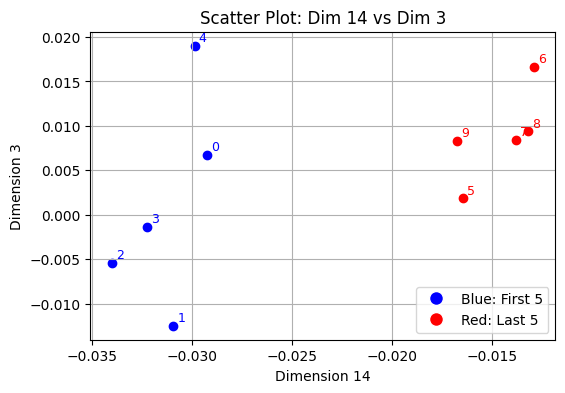

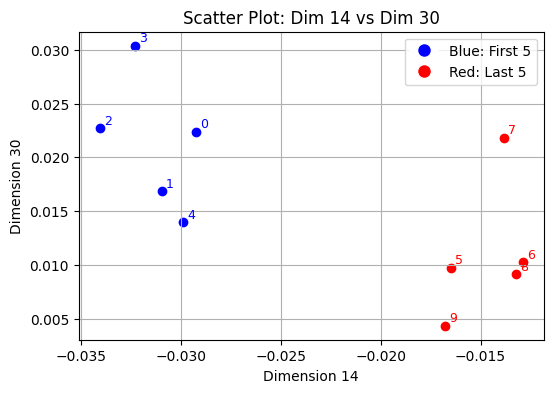

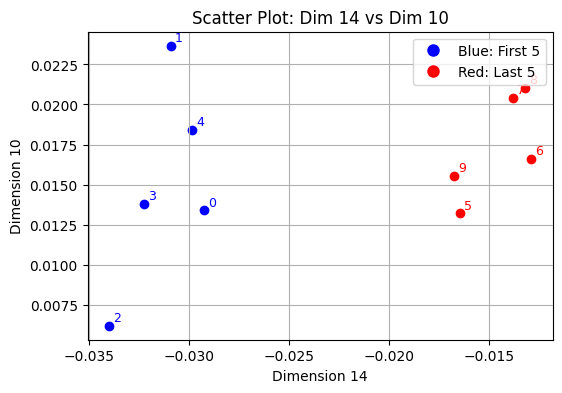

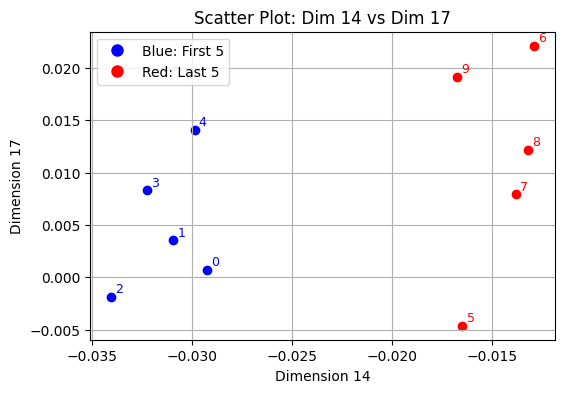

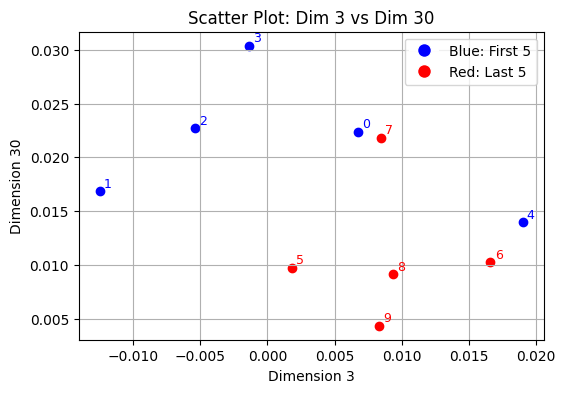

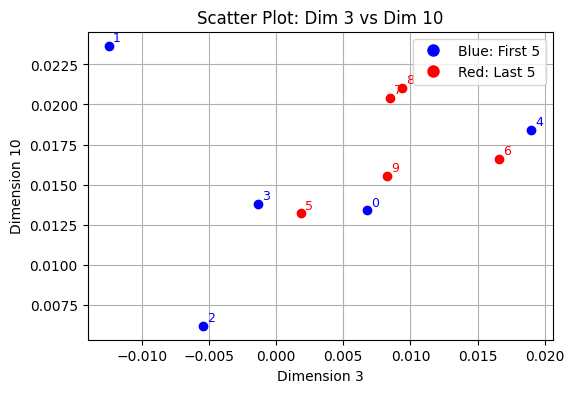

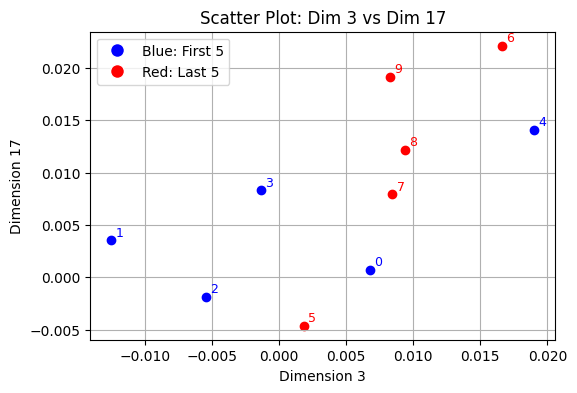

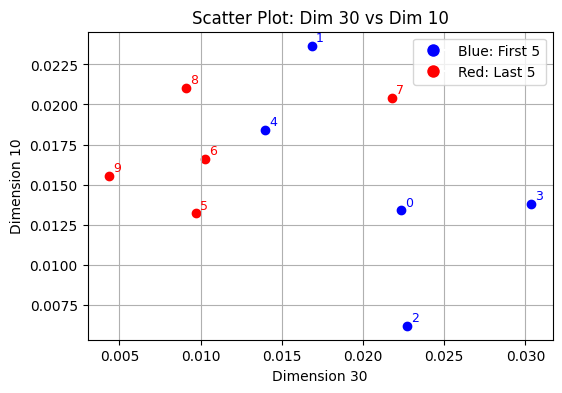

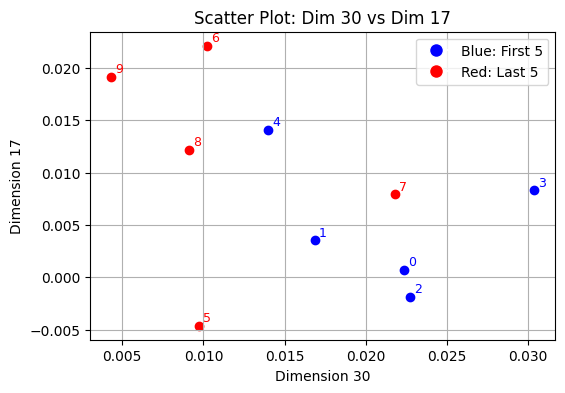

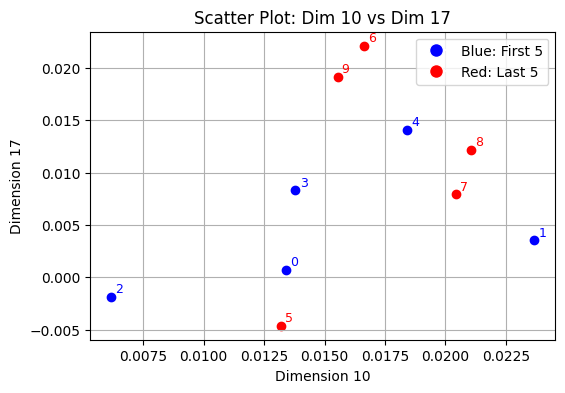

In [14]:
# logvar_mean > 0.01 の次元を選択し、上位5個のインデックスを取得
selected_dims = np.where(logvar_mean > 0.01)[0]
if len(selected_dims) > 5:
    # 上位5個を選択（降順でソート）
    top_5_dims = selected_dims[np.argsort(logvar_mean[selected_dims])[-5:]]
else:
    top_5_dims = selected_dims

if len(top_5_dims) < 2:
    print("選択された次元が2つ未満です。プロットできません。")
else:
    # すべての次元ペアを列挙
    dim_combinations = list(combinations(top_5_dims, 2))

    # サンプルごとのラベル（前半5つを青、後半5つを赤）
    colors = ['blue'] * 5 + ['red'] * 5

    # 各組み合わせについてプロット
    for dim_pair in dim_combinations:
        x_dim, y_dim = dim_pair
        plt.figure(figsize=(6, 4))

        # 散布図をプロット
        for i in range(len(mu)):
            plt.scatter(mu[i, x_dim], mu[i, y_dim], color=colors[i])
            plt.annotate(str(i), (mu[i, x_dim], mu[i, y_dim]), fontsize=9, color=colors[i], xytext=(3, 3),
                         textcoords='offset points')  # インデックスを表示

        # グラフ設定
        plt.title(f"Scatter Plot: Dim {x_dim} vs Dim {y_dim}")
        plt.xlabel(f"Dimension {x_dim}")
        plt.ylabel(f"Dimension {y_dim}")
        plt.grid()

        # カラーレジェンドを1回だけ表示
        handles = [plt.Line2D([0], [0], marker='o', color='w', label='Blue: First 5', markersize=10, markerfacecolor='blue'),
                   plt.Line2D([0], [0], marker='o', color='w', label='Red: Last 5', markersize=10, markerfacecolor='red')]
        plt.legend(handles=handles)

        plt.show()

In [7]:
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import numpy as np

def visualize_latent_space(mu, method='pca'):
    # 圧縮前のインデックス作成
    indices = np.arange(mu.shape[0])
    # indices = np.array([7, 8, 3, 0, 6, 4, 9, 2, 1, 5])
    
    # カラーリストを用意（前半を青、後半を赤に色分け）
    colors = ['blue'] * 5 + ['red'] * 5

    if method == 'pca':
        reducer = PCA(n_components=2)
        reduced_mu = reducer.fit_transform(mu)
        print(reduced_mu)
        
        # 累積寄与率をプロット
        explained_variance = reducer.explained_variance_ratio_
        
        print(explained_variance)
        cumulative_variance = explained_variance.cumsum()
        plt.figure(figsize=(8, 6))
        plt.step(range(1, len(cumulative_variance) + 1), cumulative_variance, where='mid', label='Cumulative explained variance')
        plt.bar(range(1, len(explained_variance) + 1), explained_variance, alpha=0.5, label='Individual explained variance')
        plt.xlabel('Principal component index')
        plt.ylabel('Explained variance ratio')
        plt.legend()
        plt.title('PCA Explained Variance')
        plt.show()

    elif method == 'tsne':
        perplexity = min(30, mu.shape[0] // 2)
        reducer = TSNE(n_components=2, perplexity=perplexity, random_state=42)
        reduced_mu = reducer.fit_transform(mu)
    else:
        raise ValueError("Unknown method for dimensionality reduction")

    # 2Dプロット（インデックスと色分け付き）
    plt.figure(figsize=(8, 6))
    for i, (x, y) in enumerate(reduced_mu):
        plt.scatter(x, y, alpha=0.6, edgecolor='k', color=colors[i])  # 色を指定
        plt.text(x, y, str(indices[i]), fontsize=8, ha='right', color=colors[i])  # インデックスも同じ色で表示
    plt.title(f"{method.upper()} Visualization of Latent Space (mu)")
    plt.xlabel("Dimension 1")
    plt.ylabel("Dimension 2")
    plt.savefig(f'ckpt_dir1208_p_c_ac50_epi10tmpout3000_gripper_visz/latent_data/mu_{method}.png')
    plt.show()


In [24]:
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import numpy as np

def visualize_latent_space(mu, method='pca'):
    # 圧縮前のインデックス作成
    indices = np.arange(mu.shape[0])
    # indices = np.array([7, 8, 3, 0, 6, 4, 9, 2, 1, 5])
    
    # カラーリストを用意（前半を青、後半を赤に色分け）
    colors = ['blue'] * 5 + ['red'] * 5

    if method == 'pca':
        reducer = PCA(n_components=2)
        reduced_mu = reducer.fit_transform(mu)
        print(reduced_mu)
        
        # 累積寄与率をプロット
        explained_variance = reducer.explained_variance_ratio_
        
        print(explained_variance)
        cumulative_variance = explained_variance.cumsum()
        plt.figure(figsize=(10, 8))  # プロットサイズを大きく
        plt.step(range(1, len(cumulative_variance) + 1), cumulative_variance, where='mid', label='Cumulative explained variance')
        plt.bar(range(1, len(explained_variance) + 1), explained_variance, alpha=0.5, label='Individual explained variance')
        plt.xlabel('Principal component index', fontsize=14)
        plt.ylabel('Explained variance ratio', fontsize=14)
        plt.legend(fontsize=12)
        plt.title('PCA Explained Variance', fontsize=16)
        plt.show()

    elif method == 'tsne':
        perplexity = min(30, mu.shape[0] // 2)
        reducer = TSNE(n_components=2, perplexity=perplexity, random_state=42)
        reduced_mu = reducer.fit_transform(mu)
    else:
        raise ValueError("Unknown method for dimensionality reduction")

    # 2Dプロット（インデックスと色分け付き）
    # plt.figure(figsize=(10, 8))  # プロットサイズを大きく
    for i, (x, y) in enumerate(reduced_mu):
        plt.scatter(x, y, alpha=0.7, edgecolor='k', color=colors[i], s=100)  # 色とサイズを指定
        plt.text(x, y, str(indices[i]), fontsize=14, ha='right', color=colors[i])  # インデックスを大きく表示
    plt.title(f"{method.upper()} Visualization of Latent Space (mu)", fontsize=16)
    plt.xlabel("Dimension 1", fontsize=14)
    plt.ylabel("Dimension 2", fontsize=14)
    plt.savefig(f'ckpt_dir1208_p_c_ac50_epi10tmpout3000_gripper_visz/latent_data/mu_{method}.png')
    plt.show()


In [25]:
# from sklearn.decomposition import PCA
# from sklearn.manifold import TSNE
# import matplotlib.pyplot as plt
# import numpy as np

# def visualize_latent_space(mu, method='pca'):
#     # 圧縮前のインデックス作成
#     original_indices = np.array([7, 8, 3, 0, 6, 4, 9, 2, 1, 5])
#     # 順序を元に戻す
#     sorted_mu = mu[np.argsort(original_indices)]  # original_indicesの昇順に基づいて並べ替え
#     indices = np.arange(sorted_mu.shape[0])  # 新しいインデックスを生成（0, 1, 2, ...）

#     # カラーリストを用意（前半を青、後半を赤に色分け）
#     colors = ['blue'] * 5 + ['red'] * 5

#     if method == 'pca':
#         reducer = PCA(n_components=2)
#         reduced_mu = reducer.fit_transform(sorted_mu)
        
#         # 累積寄与率をプロット
#         explained_variance = reducer.explained_variance_ratio_
#         cumulative_variance = explained_variance.cumsum()
#         plt.figure(figsize=(8, 6))
#         plt.step(range(1, len(cumulative_variance) + 1), cumulative_variance, where='mid', label='Cumulative explained variance')
#         plt.bar(range(1, len(explained_variance) + 1), explained_variance, alpha=0.5, label='Individual explained variance')
#         plt.xlabel('Principal component index')
#         plt.ylabel('Explained variance ratio')
#         plt.legend()
#         plt.title('PCA Explained Variance')
#         plt.show()

#     elif method == 'tsne':
#         perplexity = min(30, sorted_mu.shape[0] // 2)
#         reducer = TSNE(n_components=2, perplexity=perplexity, random_state=42)
#         reduced_mu = reducer.fit_transform(sorted_mu)
#     else:
#         raise ValueError("Unknown method for dimensionality reduction")

#     # 2Dプロット（インデックスと色分け付き）
#     plt.figure(figsize=(8, 6))
#     for i, (x, y) in enumerate(reduced_mu):
#         plt.scatter(x, y, alpha=0.6, edgecolor='k', color=colors[i])  # 色を指定
#         plt.text(x, y, str(indices[i]), fontsize=8, ha='right', color=colors[i])  # インデックスも同じ色で表示
#     plt.title(f"{method.upper()} Visualization of Latent Space (mu)")
#     plt.xlabel("Dimension 1")
#     plt.ylabel("Dimension 2")
    
#     plt.savefig(f'ckpt_dir1208_p_c_ac50_epi10tmpout3000_gripper_visz/latent_data/mu_{method}.png')
#     plt.show()

[[-0.0392849   0.01478367]
 [-0.02338011 -0.02391621]
 [-0.03560946 -0.01109494]
 [-0.04406194  0.0022392 ]
 [-0.0066696   0.04081756]
 [ 0.02576414 -0.02600526]
 [ 0.0374002   0.01633614]
 [ 0.0187389  -0.03071132]
 [ 0.02296304  0.00674104]
 [ 0.04413974  0.01081014]]
[0.5077847  0.22991233]


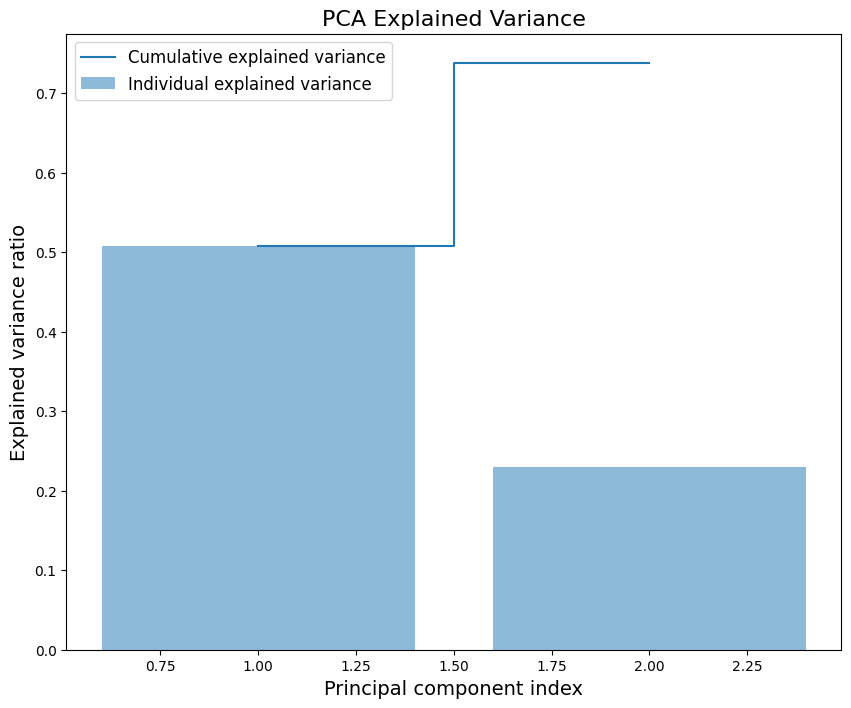

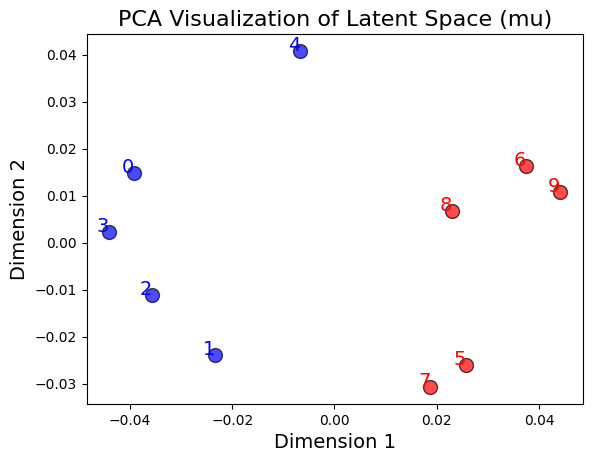

In [26]:
# PCAで可視化
visualize_latent_space(mu, method='pca')


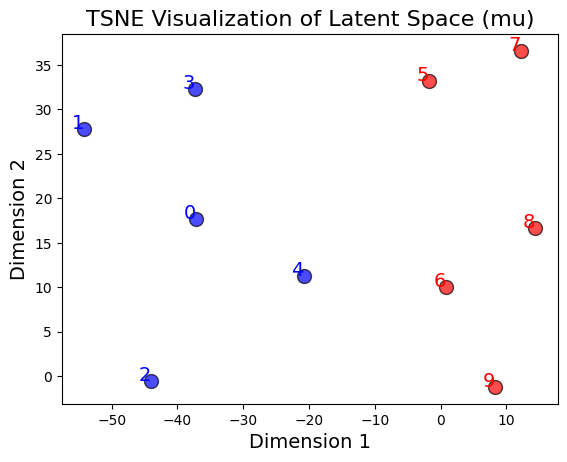

In [27]:
# # t-SNEで可視化
visualize_latent_space(mu, method='tsne')

In [12]:
import numpy as np
import matplotlib.pyplot as plt

def visualize_latent_space(mu, labels, threshold=0.05):
    """
    平均値が閾値を超える次元をプロットする関数。
    
    Parameters:
        mu (np.ndarray): (N, D) の形状を持つデータ。
        labels (np.ndarray): データのラベル情報。
        threshold (float): 平均値の閾値。
    """
    # 各次元の平均値を計算
    dimension_means = np.mean(mu, axis=0)
    
    # 平均が閾値を超える次元を取得
    selected_dimensions = np.where(dimension_means > threshold)[0]
    print(f"平均が {threshold} より大きい次元: {selected_dimensions}")
    
    # 平均が閾値を超える次元が2未満の場合は終了
    if len(selected_dimensions) < 2:
        print("プロットするには少なくとも2つの次元が必要です。")
        return
    
    # 全組み合わせでプロット
    for i in range(len(selected_dimensions)):
        for j in range(i + 1, len(selected_dimensions)):
            dim_x, dim_y = selected_dimensions[i], selected_dimensions[j]
            
            # プロット
            plt.figure(figsize=(8, 6))
            for label in np.unique(labels):
                indices = labels == label
                plt.scatter(
                    mu[indices, dim_x], 
                    mu[indices, dim_y], 
                    label=f'Class {label}', alpha=0.7
                )
            plt.title(f"Latent Space Visualization (Dim {dim_x} vs Dim {dim_y})")
            plt.xlabel(f"Dimension {dim_x}")
            plt.ylabel(f"Dimension {dim_y}")
            plt.legend()
            plt.grid()
            plt.show()


In [13]:
labels = np.array([0,0,0,0,0,0,1,1,1,1,1])
original_indices = np.array([7, 8, 3, 0, 6, 4, 9, 2, 1, 5])
    # 順序を元に戻す
sorted_mu = mu[np.argsort(original_indices)]  # original_indicesの昇順に基づいて並べ替え
visualize_latent_space(mu,sorted_mu)

平均が 0.05 より大きい次元: []
プロットするには少なくとも2つの次元が必要です。


[[0.99809647 0.86377555 1.0006806  0.9477761  1.0796247  1.0405777
  0.94392323 1.0489001  1.0252777  1.0495204  0.98164696 0.94300234
  0.83774555 1.0846181  1.0221097  1.0288771  0.9823586  0.8909383
  0.9347113  0.9118488  1.0178965  1.0306036  1.0473918  0.9116908
  0.96602476 1.1102281  0.94608325 0.8434142  1.0273764  0.9902693
  1.0146405  0.96564746]
 [0.99809647 0.86377555 1.0006806  0.9477761  1.0796247  1.0405777
  0.94392323 1.0489001  1.0252777  1.0495204  0.98164696 0.94300234
  0.83774555 1.0846181  1.0221097  1.0288771  0.9823586  0.8909383
  0.9347113  0.9118488  1.0178965  1.0306036  1.0473918  0.9116908
  0.96602476 1.1102281  0.94608325 0.8434142  1.0273764  0.9902693
  1.0146405  0.96564746]]


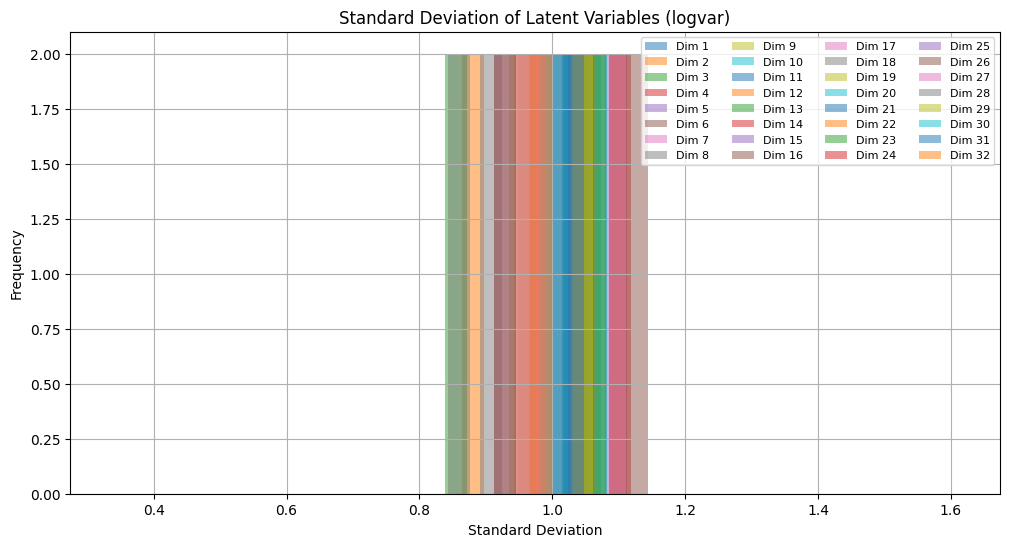

In [9]:
plot_logvar_std(logvar)